<a href="https://colab.research.google.com/github/G-habib/pfe_models/blob/main/PNDM_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# file_url='https://github.com/vappiah/Machine-Learning-Tutorials/raw/main/data/cancer_gene_expression.zip'

# dataframe=pd.read_csv(file_url)

In [10]:
PNDM_dataset = pd.read_csv('/content/PNDM.csv')

In [11]:
PNDM_dataset.head()

,Age,HbA1c,Genetic Info,Family History,Birth Weight,Developmental Delay,Insulin Level,PNDM
0,3,4.840927,Mutation,Yes,3.128268,No,5.585608,0
1,3,5.694742,Mutation,No,2.059342,No,3.141359,1
2,7,6.843595,No mutation,No,2.718667,Yes,4.639313,0
3,2,6.480186,No mutation,No,3.087017,No,6.217178,0
4,4,7.052861,Mutation,No,3.481472,No,3.368892,0


In [12]:
PNDM_dataset.shape

(100000, 8)

In [13]:
PNDM_dataset.describe()

,Age,HbA1c,Birth Weight,Insulin Level,PNDM
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,6.000500,6.996700,2.801585,5.003078,0.048220
std,3.166048,0.998358,0.500464,1.992177,0.214232
min,1.000000,2.830618,0.427123,-3.242078,0.000000
25%,3.000000,6.323205,2.463519,3.661212,0.000000
50%,6.000000,6.996069,2.800933,5.002304,0.000000
75%,9.000000,7.670997,3.139870,6.348078,0.000000
max,11.000000,11.315256,4.910420,13.304440,1.000000


In [14]:
PNDM_dataset['PNDM'].value_counts()

0    95178
1     4822
Name: PNDM, dtype: int64

<Axes: >

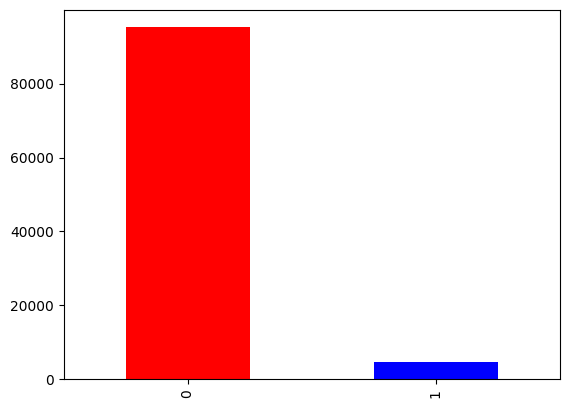

In [15]:
PNDM_dataset['PNDM'].value_counts().plot(kind='bar', color=['red', 'blue'])

In [19]:
PNDM_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  100000 non-null  int64  
 1   HbA1c                100000 non-null  float64
 2   Genetic Info         100000 non-null  object 
 3   Family History       100000 non-null  object 
 4   Birth Weight         100000 non-null  float64
 5   Developmental Delay  100000 non-null  object 
 6   Insulin Level        100000 non-null  float64
 7   PNDM                 100000 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 6.1+ MB


In [26]:
PNDM_dataset.drop_duplicates(keep='first', inplace=True)
PNDM_dataset

,Age,HbA1c,Genetic Info,Family History,Birth Weight,Developmental Delay,Insulin Level,PNDM
0,3,4.840927,Mutation,Yes,3.128268,No,5.585608,0
1,3,5.694742,Mutation,No,2.059342,No,3.141359,1
2,7,6.843595,No mutation,No,2.718667,Yes,4.639313,0
3,2,6.480186,No mutation,No,3.087017,No,6.217178,0
4,4,7.052861,Mutation,No,3.481472,No,3.368892,0
...,...,...,...,...,...,...,...,...
99995,9,7.810662,No mutation,Yes,2.031233,No,3.059450,0
99996,11,7.163781,Mutation,Yes,3.003822,No,2.891719,0
99997,10,5.521820,No mutation,No,3.798452,Yes,6.015360,0
99998,10,7.539210,No mutation,No,3.117501,No,4.128981,0


In [27]:
PNDM_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  100000 non-null  int64  
 1   HbA1c                100000 non-null  float64
 2   Genetic Info         100000 non-null  object 
 3   Family History       100000 non-null  object 
 4   Birth Weight         100000 non-null  float64
 5   Developmental Delay  100000 non-null  object 
 6   Insulin Level        100000 non-null  float64
 7   PNDM                 100000 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 6.9+ MB


In [28]:
#standardization
# normalisation of Genetic info, Family history, Developmental delay : into numerical values
cat_feature = ['Genetic Info', 'Family History', 'Developmental Delay']
dummy_PNDM_dataset = pd.get_dummies(PNDM_dataset[cat_feature])
PNDM_dataset = pd.concat([PNDM_dataset, dummy_PNDM_dataset],axis=1)
PNDM_dataset = PNDM_dataset.drop(cat_feature, axis=1)

PNDM_dataset.shape

(100000, 11)

In [29]:
PNDM_dataset.head()

,Age,HbA1c,Birth Weight,Insulin Level,PNDM,Genetic Info_Mutation,Genetic Info_No mutation,Family History_No,Family History_Yes,Developmental Delay_No,Developmental Delay_Yes
0,3,4.840927,3.128268,5.585608,0,1,0,0,1,1,0
1,3,5.694742,2.059342,3.141359,1,1,0,1,0,1,0
2,7,6.843595,2.718667,4.639313,0,0,1,1,0,0,1
3,2,6.480186,3.087017,6.217178,0,0,1,1,0,1,0
4,4,7.052861,3.481472,3.368892,0,1,0,1,0,1,0


In [30]:
# separating the data and label
X = PNDM_dataset.drop(columns = 'PNDM', axis=1)
Y = PNDM_dataset['PNDM']

In [31]:
X

,Age,HbA1c,Birth Weight,Insulin Level,Genetic Info_Mutation,Genetic Info_No mutation,Family History_No,Family History_Yes,Developmental Delay_No,Developmental Delay_Yes
0,3,4.840927,3.128268,5.585608,1,0,0,1,1,0
1,3,5.694742,2.059342,3.141359,1,0,1,0,1,0
2,7,6.843595,2.718667,4.639313,0,1,1,0,0,1
3,2,6.480186,3.087017,6.217178,0,1,1,0,1,0
4,4,7.052861,3.481472,3.368892,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
99995,9,7.810662,2.031233,3.059450,0,1,0,1,1,0
99996,11,7.163781,3.003822,2.891719,1,0,0,1,1,0
99997,10,5.521820,3.798452,6.015360,0,1,1,0,0,1
99998,10,7.539210,3.117501,4.128981,0,1,1,0,1,0


In [33]:
Y

0        0
1        1
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: PNDM, Length: 100000, dtype: int64

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)

(7604, 10)


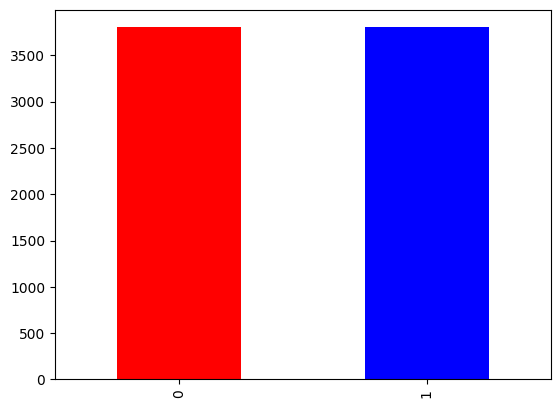

In [35]:
# Balancing the Dataset
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=101)
x_under, y_under = undersample.fit_resample(X_train, Y_train)

print(x_under.shape)
y_under.value_counts().plot(kind='bar', color=['red', 'blue'])
plt.show()

In [36]:
# building model
model = RandomForestClassifier()
model.fit(x_under, y_under)

RandomForestClassifier()

In [37]:
# accuracy score on the training data
X_train_prediction = model.predict(x_under)
training_data_accuracy = accuracy_score(X_train_prediction, y_under)

In [38]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [39]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [40]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9996


In [42]:
# trying my model prediction with new data
new_data = (3,5.694742,2.059342,3.141359,1,0,1,0,1,0)

# changing the input_data to numpy array
new_data_to_array = np.asarray(new_data)

# reshape the array as we are predicting for one instance
new_patient_data = new_data_to_array.reshape(1,-1)

prediction = model.predict(new_patient_data)
print(prediction)

if (prediction[0] == 0):
  print('The patient does not have PNDM')
else:
  print('The patient have PNDM')

[1]
The patient have PNDM


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
